In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Unzipping the zip file which contains the dataset**

In [ ]:
!unzip "/content/drive/MyDrive/Intoxication-Identifier-master.zip"

Archive:  /content/drive/MyDrive/Intoxication-Identifier-master.zip
adc7e15c8a46c18c3a91393bebf3e1993133f12e
   creating: Intoxication-Identifier-master/
   creating: Intoxication-Identifier-master/.idea/
 extracting: Intoxication-Identifier-master/.idea/.gitignore  
   creating: Intoxication-Identifier-master/.idea/inspectionProfiles/
  inflating: Intoxication-Identifier-master/.idea/inspectionProfiles/profiles_settings.xml  
  inflating: Intoxication-Identifier-master/.idea/intoxication-identifier.iml  
  inflating: Intoxication-Identifier-master/.idea/misc.xml  
  inflating: Intoxication-Identifier-master/.idea/modules.xml  
  inflating: Intoxication-Identifier-master/.idea/vcs.xml  
  inflating: Intoxication-Identifier-master/LICENSE  
  inflating: Intoxication-Identifier-master/README.md  
   creating: Intoxication-Identifier-master/croppedImages/
  inflating: Intoxication-Identifier-master/croppedImages/drunk01_0.jpg  
  inflating: Intoxication-Identifier-master/croppedImages/dru

**importing modules**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as  plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping


In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import save
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Reshape, LSTM
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.metrics import binary_crossentropy
from tensorflow.keras.utils import to_categorical
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import LSTM ,Reshape
from keras.layers import Flatten, BatchNormalization
from keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

**the directory in which zip while is stored on google Drive**

In [ ]:
base = 'Intoxication-Identifier-master'

**loading the dataset and splitting it into 85% training and 15% testing**

In [ ]:
image_data = np.load(base+'/preprocessing/ImageData.npy')
labels = np.load(base + '/preprocessing/labels.npy')
flipped_image_data = np.load(base + '/imageAugmentation/flipped_ImageData.npy')
flipped_labels = np.load(base + '/imageAugmentation/flipped_labels.npy')
mirrored_image_data = np.load(base+'/imageAugmentation/mirrored_ImageData.npy')
mirrored_labels = np.load(base+'/imageAugmentation/mirrored_labels.npy')
blurred_image_data = np.load(base+'/imageAugmentation/blurred_ImageData.npy')
blurred_labels = np.load(base+'/imageAugmentation/blurred_labels.npy')

train_test_split = 0.85 #training percentage
image_data_train = image_data[:int(image_data.shape[0]*(train_test_split))]
image_data_test = image_data[int(image_data.shape[0]*train_test_split):]
labels_train = labels[:int(labels.shape[0]*(train_test_split))]
labels_test = labels[int(labels.shape[0]*train_test_split):]
flipped_image_data_train = flipped_image_data[:int(flipped_image_data.shape[0]*(train_test_split))]
flipped_image_data_test = flipped_image_data[int(flipped_image_data.shape[0]*train_test_split):]
flipped_labels_train = flipped_labels[:int(flipped_labels.shape[0]*(train_test_split))]
flipped_labels_test = flipped_labels[int(flipped_labels.shape[0]*train_test_split):]
mirrored_image_data_train = mirrored_image_data[:int(mirrored_image_data.shape[0]*(train_test_split))]
mirrored_image_data_test = mirrored_image_data[int(mirrored_image_data.shape[0]*train_test_split):]
mirrored_labels_train = mirrored_labels[:int(mirrored_labels.shape[0]*(train_test_split))]
mirrored_labels_test = mirrored_labels[int(mirrored_labels.shape[0]*train_test_split):]
blurred_image_data_train = blurred_image_data[:int(blurred_image_data.shape[0]*(train_test_split))]
blurred_image_data_test = blurred_image_data[int(blurred_image_data.shape[0]*train_test_split):]
blurred_labels_train = blurred_labels[:int(blurred_labels.shape[0]*(train_test_split))]
blurred_labels_test = blurred_labels[int(blurred_labels.shape[0]*train_test_split):]

In [ ]:
X_train = np.concatenate((image_data_train, flipped_image_data_train, mirrored_image_data_train, blurred_image_data_train), axis=0)
X_test = np.concatenate((image_data_test, flipped_image_data_test, mirrored_image_data_test, blurred_image_data_test), axis=0)

In [ ]:
y_train = np.concatenate((labels_train, flipped_labels_train, mirrored_labels_train, blurred_labels_train), axis=0)
y_test = np.concatenate((labels_test, flipped_labels_test, mirrored_labels_test, blurred_labels_test), axis=0)

**function train_model(..) is used for model fitting/training**

**ReduceLROnPlateau is used for reducing the learning rate if the model accuracy doesnot increase**

**ModelCheckpoint is used for storing the weights of the best accuracy/loss obtained while training**

**EarlingStopping is used to stop the training process once the validation loss starts increasing**

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size,model_name):
  # Data generator
  # #datagen = ImageDataGenerator(rotation_range = 5,
  #                              rescale = 1./255,
  #                              width_shift_range = 0.1,
  #                              height_shift_range = 0.1,
  #                              horizontal_flip = True)
  # iteration on the training set
  #it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  #it_test = datagen.flow(X_test, y_test, batch_size = batch_size)
  # path to save checkpoint
  path_cp = base + '/weights/' + model_name + '_weights_.hdf5'

  rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, verbose = 1,
                                min_delta = 1e-4, min_lr = 1e-6, mode = 'min', cooldown=1)

  ckp = ModelCheckpoint(path_cp,monitor = 'val_loss',
                      verbose = 1, save_best_only = True, mode = 'min')

  es = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, patience = 4, mode = 'min', restore_best_weights = True, verbose = 1)

  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit(X_train,y_train, epochs = epochs, steps_per_epoch = steps, validation_data = (X_test,y_test), verbose = 1, callbacks = [rlr,ckp,es])

  return history

**VGG19**

**State of the art model pretrained model, gives 84% testing accuracy**

**The weights used here are from vgg19 model trained on imagenet dataset**

**The starting layers are kept trainable for weight optimization**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

model_train = VGG19(input_shape=(128,128,3) , weights='imagenet', include_top=False)

for layer in model_train.layers:
    layer.trainable = True

x = Reshape((4*4,512))(model_train.output)
x = Flatten()(x)
x = Dense(256)(x)
x = Dense(64)(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model3 = Model(inputs=model_train.input, outputs=prediction)


In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

In [ ]:
train_history = train_model(model3, X_train, y_train, X_test, y_test, epochs = 10, batch_size = 8, model_name='vgg19')

Epoch 1/10
90/90 [==============================] - ETA: 0s - loss: 0.8283 - acc: 0.5292
Epoch 1: val_loss improved from inf to 0.59951, saving model to Intoxication-Identifier-master/weights/vgg19_weights_.hdf5
90/90 [==============================] - 9s 88ms/step - loss: 0.8283 - acc: 0.5292 - val_loss: 0.5995 - val_acc: 0.7266 - lr: 1.0000e-04
Epoch 2/10
90/90 [==============================] - ETA: 0s - loss: 0.6753 - acc: 0.6111
Epoch 2: val_loss improved from 0.59951 to 0.53498, saving model to Intoxication-Identifier-master/weights/vgg19_weights_.hdf5
90/90 [==============================] - 8s 86ms/step - loss: 0.6753 - acc: 0.6111 - val_loss: 0.5350 - val_acc: 0.8359 - lr: 1.0000e-04
Epoch 3/10
90/90 [==============================] - ETA: 0s - loss: 0.6031 - acc: 0.7028
Epoch 3: val_loss did not improve from 0.53498
90/90 [==============================] - 7s 75ms/step - loss: 0.6031 - acc: 0.7028 - val_loss: 0.5798 - val_acc: 0.6484 - lr: 1.0000e-04
Epoch 4/10
90/90 [=======

4/4 [==============================] - 0s 76ms/step - loss: 0.5622 - acc: 0.8359

Testing Accuracy: 83.59%


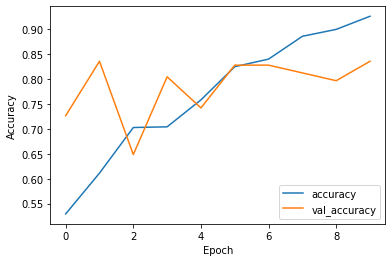

In [ ]:
results = model3.evaluate(X_test, y_test)
print('\nTesting Accuracy: {:.2f}%'.format(results[1]*100))

plt.plot(train_history.history['acc'], label='accuracy')
plt.plot(train_history.history['val_acc'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [ ]:
model3.save(base+"/vgg19.h5")

**VGG16**

**State of the art model pretrained model, gives 87% testing accuracy**

**The weights used here are from vgg16 model trained on imagenet dataset**

**The starting layers are kept trainable for weight optimization**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model_train = VGG16(input_shape=(128,128,3) , weights='imagenet', include_top=False)

for layer in model_train.layers:
    layer.trainable = True

x = Reshape((4*4,512))(model_train.output)
x = Flatten()(x)
x = Dense(256)(x)
x = Dense(64)(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model4 = Model(inputs=model_train.input, outputs=prediction)


In [ ]:
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

In [ ]:
train_history = train_model(model4, X_train, y_train, X_test, y_test, epochs = 10, batch_size = 16 ,model_name='vgg16')

Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: 0.2169 - acc: 0.9222
Epoch 1: val_loss improved from inf to 0.34182, saving model to Intoxication-Identifier-master/weights/vgg16_weights_.hdf5
45/45 [==============================] - 5s 105ms/step - loss: 0.2169 - acc: 0.9222 - val_loss: 0.3418 - val_acc: 0.8203 - lr: 1.0000e-04
Epoch 2/10
45/45 [==============================] - ETA: 0s - loss: 0.1498 - acc: 0.9486
Epoch 2: val_loss did not improve from 0.34182
45/45 [==============================] - 4s 86ms/step - loss: 0.1498 - acc: 0.9486 - val_loss: 0.3635 - val_acc: 0.8359 - lr: 1.0000e-04
Epoch 3/10
45/45 [==============================] - ETA: 0s - loss: 0.0819 - acc: 0.9694
Epoch 3: val_loss improved from 0.34182 to 0.31401, saving model to Intoxication-Identifier-master/weights/vgg16_weights_.hdf5
45/45 [==============================] - 5s 101ms/step - loss: 0.0819 - acc: 0.9694 - val_loss: 0.3140 - val_acc: 0.8672 - lr: 1.0000e-04
Epoch 4/10
45/45 [=====

4/4 [==============================] - 0s 63ms/step - loss: 0.3140 - acc: 0.8672

Testing Accuracy: 86.72%


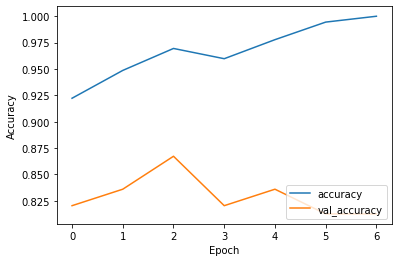

In [ ]:
results = model4.evaluate(X_test, y_test)
print('\nTesting Accuracy: {:.2f}%'.format(results[1]*100))

plt.plot(train_history.history['acc'], label='accuracy')
plt.plot(train_history.history['val_acc'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [ ]:
model4.save(base+"/models_vgg16.h5")

**MOBILENET  V2**

 It is based on an inverted residual structure where the residual connections are between the bottleneck layers.

 The accuracy obtained on testing dataset is 72%

In [ ]:
from tensorflow.keras.applications.mobilenet_v2  import MobileNetV2

model_train = MobileNetV2(input_shape=(128,128,3) , weights='imagenet', include_top=False)

for layer in model_train.layers:
    layer.trainable = True

x = Reshape((4*4, 1280))(model_train.output)
x = Flatten()(x)
x = Dense(128)(x)
x = Dense(16)(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model2 = Model(inputs=model_train.input, outputs=prediction)


In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

In [ ]:
train_history = train_model(model2, X_train, y_train, X_test, y_test, epochs = 10, batch_size = 4,model_name='mobilenet_v2')

Epoch 1/10
180/180 [==============================] - ETA: 0s - loss: 2.8149 - acc: 0.6431
Epoch 1: val_loss improved from inf to 4.09194, saving model to Intoxication-Identifier-master/weights/mobilenet_v2_weights_.hdf5
180/180 [==============================] - 11s 30ms/step - loss: 2.8149 - acc: 0.6431 - val_loss: 4.0919 - val_acc: 0.5625 - lr: 1.0000e-04
Epoch 2/10
178/180 [============================>.] - ETA: 0s - loss: 1.8424 - acc: 0.7584
Epoch 2: val_loss did not improve from 4.09194
180/180 [==============================] - 4s 21ms/step - loss: 1.8244 - acc: 0.7597 - val_loss: 10.2875 - val_acc: 0.5312 - lr: 1.0000e-04
Epoch 3/10
179/180 [============================>.] - ETA: 0s - loss: 1.1488 - acc: 0.8324
Epoch 3: val_loss improved from 4.09194 to 3.16890, saving model to Intoxication-Identifier-master/weights/mobilenet_v2_weights_.hdf5
180/180 [==============================] - 4s 25ms/step - loss: 1.1426 - acc: 0.8333 - val_loss: 3.1689 - val_acc: 0.5859 - lr: 1.0000e-

4/4 [==============================] - 0s 24ms/step - loss: 1.3133 - acc: 0.7109

Testing Accuracy: 71.09%


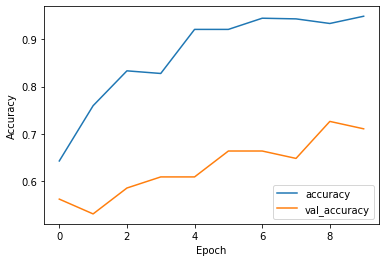

In [ ]:
results = model2.evaluate(X_test, y_test)
print('\nTesting Accuracy: {:.2f}%'.format(results[1]*100))

plt.plot(train_history.history['acc'], label='accuracy')
plt.plot(train_history.history['val_acc'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [ ]:
model2.save(base+"/models_mobilenetv2.h5")

**RESNET 50**

ResNet50 uses residual blocks which is used for linear mapping.

The validation accuracy obtained for ResNet50 is 74%

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model_train = ResNet50(input_shape=(128,128,3) , weights='imagenet', include_top=False)

for layer in model_train.layers:
    layer.trainable = False

x = Reshape((4*4, 2048))(model_train.output) #reshape the output from resnet50
x = Flatten()(x)
x = Dense(128)(x)
x = Dense(64)(x)
prediction = Dense(2, activation='softmax')(x) #2 classes

# create a model object
model = Model(inputs=model_train.input, outputs=prediction)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

In [ ]:
train_history = train_model(model, X_train, y_train, X_test, y_test, epochs = 10, batch_size = 4,model_name='resnet')

Epoch 1/10
177/180 [============================>.] - ETA: 0s - loss: 0.4598 - acc: 0.7895
Epoch 1: val_loss improved from inf to 0.59440, saving model to Intoxication-Identifier-master/weights/resnet_weights_.hdf5
180/180 [==============================] - 3s 18ms/step - loss: 0.4655 - acc: 0.7861 - val_loss: 0.5944 - val_acc: 0.6016 - lr: 1.0000e-04
Epoch 2/10
179/180 [============================>.] - ETA: 0s - loss: 0.5101 - acc: 0.7402
Epoch 2: val_loss improved from 0.59440 to 0.53668, saving model to Intoxication-Identifier-master/weights/resnet_weights_.hdf5
180/180 [==============================] - 3s 18ms/step - loss: 0.5109 - acc: 0.7403 - val_loss: 0.5367 - val_acc: 0.7969 - lr: 1.0000e-04
Epoch 3/10
178/180 [============================>.] - ETA: 0s - loss: 0.4347 - acc: 0.7921
Epoch 3: val_loss improved from 0.53668 to 0.50795, saving model to Intoxication-Identifier-master/weights/resnet_weights_.hdf5
180/180 [==============================] - 3s 17ms/step - loss: 0.438

4/4 [==============================] - 0s 52ms/step - loss: 0.4852 - acc: 0.7344

Testing Accuracy: 73.44%


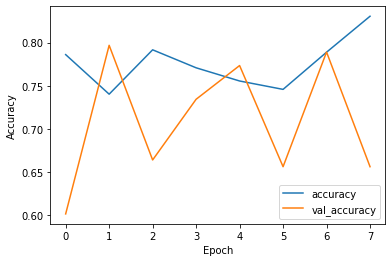

In [ ]:
results = model.evaluate(X_test, y_test)
print('\nTesting Accuracy: {:.2f}%'.format(results[1]*100))

plt.plot(train_history.history['acc'], label='accuracy')
plt.plot(train_history.history['val_acc'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save(base+"/models_resnet50.h5")

**LSTM ATTENTION MECHANISM**

LSTM is used to remeber the output from previous state and Attention mechanism is used to give attention to only regions in an image which carries valuable information.

The validation accuracy obtained is 75%.

In [ ]:
import os

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate, Layer

debug_flag = int(os.environ.get('KERAS_ATTENTION_DEBUG', 0))

# KERAS_ATTENTION_DEBUG: If set to 1. Will switch to debug mode.
# In debug mode, the class Attention is no longer a Keras layer.
# What it means in practice is that we can have access to the internal values
# of each tensor. If we don't use debug, Keras treats the object
# as a layer and we can only get the final output.
class Attention(object if debug_flag else Layer):

    def __init__(self, units=128, **kwargs):
        super(Attention, self).__init__(**kwargs)
        self.units = units

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        input_dim = int(input_shape[-1])
        with K.name_scope(self.name if not debug_flag else 'attention'):
            self.attention_score_vec = Dense(input_dim, use_bias=False, name='attention_score_vec')
            self.h_t = Lambda(lambda x: x[:, -1, :], output_shape=(input_dim,), name='last_hidden_state')
            self.attention_score = Dot(axes=[1, 2], name='attention_score')
            self.attention_weight = Activation('softmax', name='attention_weight')
            self.context_vector = Dot(axes=[1, 1], name='context_vector')
            self.attention_output = Concatenate(name='attention_output')
            self.attention_vector = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')
        if not debug_flag:
            # debug: the call to build() is done in call().
            super(Attention, self).build(input_shape)

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

    def __call__(self, inputs, training=None, **kwargs):
        if debug_flag:
            return self.call(inputs, training, **kwargs)
        else:
            return super(Attention, self).__call__(inputs, training, **kwargs)

    # noinspection PyUnusedLocal
    def call(self, inputs, training=None, **kwargs):
        """
        Many-to-one attention mechanism for Keras.
        @param inputs: 3D tensor with shape (batch_size, time_steps, input_dim).
        @param training: not used in this layer.
        @return: 2D tensor with shape (batch_size, units)
        @author: felixhao28, philipperemy.
        """
        if debug_flag:
          # Inside dense layer
        #              hidden_states            dot               W            =>           score_first_part
        # (batch_size, time_steps, hidden_size) dot (hidden_size, hidden_size) => (batch_size, time_steps, hidden_size)
        # W is the trainable weight matrix of attention Luong's multiplicative style score
            self.build(inputs.shape)

        score_first_part = self.attention_score_vec(inputs)
        h_t = self.h_t(inputs)
        score = self.attention_score([h_t, score_first_part])
        attention_weights = self.attention_weight(score)
        # (batch_size, time_steps, hidden_size) dot (batch_size, time_steps) => (batch_size, hidden_size)
        context_vector = self.context_vector([inputs, attention_weights])
        pre_activation = self.attention_output([context_vector, h_t])
        attention_vector = self.attention_vector(pre_activation)
        return attention_vector

    def get_config(self):

        config = super(Attention, self).get_config()
        config.update({'units': self.units})
        return config

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.1))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(Reshape((28*28, 128)))
model.add(LSTM(64, return_sequences=True))
model.add(Attention(units=32))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
training_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 4s 81ms/step - loss: 0.7294 - accuracy: 0.4681 - val_loss: 0.6907 - val_accuracy: 0.5469
Epoch 2/20
23/23 [==============================] - 1s 50ms/step - loss: 0.6938 - accuracy: 0.5125 - val_loss: 0.6938 - val_accuracy: 0.4922
Epoch 3/20
23/23 [==============================] - 1s 50ms/step - loss: 0.6893 - accuracy: 0.5542 - val_loss: 0.6899 - val_accuracy: 0.5312
Epoch 4/20
23/23 [==============================] - 1s 50ms/step - loss: 0.6859 - accuracy: 0.5542 - val_loss: 0.6916 - val_accuracy: 0.5312
Epoch 5/20
23/23 [==============================] - 1s 50ms/step - loss: 0.6813 - accuracy: 0.5611 - val_loss: 0.6894 - val_accuracy: 0.5312
Epoch 6/20
23/23 [==============================] - 1s 50ms/step - loss: 0.6589 - accuracy: 0.6278 - val_loss: 0.6913 - val_accuracy: 0.5312
Epoch 7/20
23/23 [==============================] - 1s 65ms/step - loss: 0.6368 - accuracy: 0.6583 - val_loss: 0.7058 - val_accuracy: 0.5312
Epoch 8/20
23

4/4 [==============================] - 0s 38ms/step - loss: 0.5922 - accuracy: 0.7500

Testing Accuracy: 75.00%


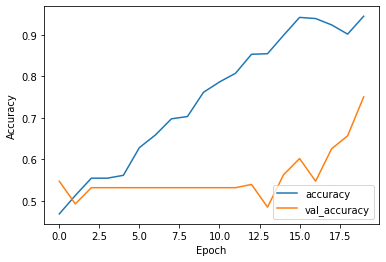

In [ ]:
results = model.evaluate(X_test, y_test)
print('\nTesting Accuracy: {:.2f}%'.format(results[1]*100))
plt.plot(training_history.history['accuracy'], label='accuracy')
plt.plot(training_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

**YOUR MODEL**

Epoch 1/20
23/23 [==============================] - 1s 32ms/step - loss: 0.7106 - accuracy: 0.4806 - val_loss: 0.6937 - val_accuracy: 0.4688
Epoch 2/20
23/23 [==============================] - 1s 22ms/step - loss: 0.6946 - accuracy: 0.5069 - val_loss: 0.6968 - val_accuracy: 0.4688
Epoch 3/20
23/23 [==============================] - 1s 22ms/step - loss: 0.6944 - accuracy: 0.5125 - val_loss: 0.6927 - val_accuracy: 0.5312
Epoch 4/20
23/23 [==============================] - 1s 23ms/step - loss: 0.6933 - accuracy: 0.4972 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 5/20
23/23 [==============================] - 1s 22ms/step - loss: 0.6933 - accuracy: 0.4931 - val_loss: 0.6932 - val_accuracy: 0.4688
Epoch 6/20
23/23 [==============================] - 1s 23ms/step - loss: 0.6921 - accuracy: 0.5278 - val_loss: 0.6932 - val_accuracy: 0.5312
Epoch 7/20
23/23 [==============================] - 1s 22ms/step - loss: 0.6898 - accuracy: 0.5111 - val_loss: 0.6889 - val_accuracy: 0.6172
Epoch 8/20
23

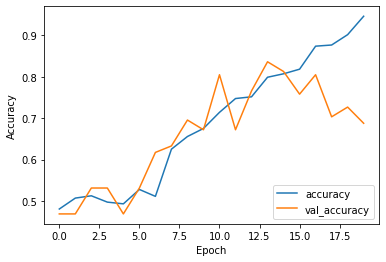

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
training_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
error = []
for i in range(predictions.shape[0]):
    if y_test[i] == 1:
        error.append(1 - predictions[i][1])
    else:
        error.append(1 - predictions[i][0])
# for i in range(len(error)):
#     if error[i] > 0.5:
#         array = X_test[i]
#         img = Image.fromarray(array, 'RGB')
#         img.show()
results = model.evaluate(X_test, y_test)
print('\nTesting Accuracy: {:.2f}%'.format(results[1]*100))

plt.plot(training_history.history['accuracy'], label='accuracy')
plt.plot(training_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()
